In [4]:
import praw
import pandas as pd
import time
# 用你的凭证初始化PRAW
reddit = praw.Reddit(client_id='csCBCXSJwrhSYQ--JqSTRA',
                     client_secret='udoq4w8gmP0_7yBLGSb57AL-oaWlxg',
                     user_agent='hh')

In [5]:
# 获取指定subreddit下的帖子及其评论
def get_posts(subreddit_name, topic, limit=10, comment_limit=20):
    subreddit = reddit.subreddit(subreddit_name)
    posts = []
    for post in subreddit.search(topic,limit=limit):
        post_info = {
            'title': post.title,
            'score': post.score,
            'created_utc': post.created_utc,
            'comments': []
        }
        post.comments.replace_more()  # Keep direct comments，drop comments of comments
        for comment in post.comments[:comment_limit]:  # Keep the top 20 comments of posts.
            comment_info = {
                'body': comment.body,
                'score': comment.score
            }
            post_info['comments'].append(comment_info)
        posts.append(post_info)
    print(posts)
    return posts

In [21]:
subreddit_name = 'wallstreetbets'
topic = 'ai'
posts = get_posts(subreddit_name,topic,limit =100,comment_limit=50)

KeyboardInterrupt: 

In [18]:
comments_data = [(post['title'], time, time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(post['created_utc'])),comment['body'], comment['score']) 
                 for post in posts for comment in post['comments']]
df_comments = pd.DataFrame(comments_data, columns=['Post Title', 'Post Time','Post Time string', 'Comment Body', 'Score'])

In [19]:
def get_month(time_string):
    return time_string.split(" ")[0][5:7]
def get_year(time_string):
    return time_string.split(" ")[0][:4]
df_comments['month']=[get_month(x) for x in df_comments['Post Time string']]
df_comments['year']=[get_year(x) for x in df_comments['Post Time string']]

In [20]:
df_comments.groupby(['year','month'])['Comment Body'].count()

year  month
2020  11         50
2022  09         50
      12         50
2023  01         50
      02        150
      04        150
      05        345
      06        362
      07        237
      08        150
      09        186
      10        100
      11        712
      12        104
2024  01        277
      02       1174
      03        276
Name: Comment Body, dtype: int64

In [10]:
df_comments

,Post Title,Post Time,Post Time string,Comment Body,Score,month,year
0,Sora means NVDA to 2000,<module 'time' (built-in)>,2024-02-16 12:48:12,\n**User Report**| | | |\n:--|:--|:--|:--\n**T...,1,02,2024
1,Sora means NVDA to 2000,<module 'time' (built-in)>,2024-02-16 12:48:12,All the options are expensive and shares are t...,185,02,2024
2,Sora means NVDA to 2000,<module 'time' (built-in)>,2024-02-16 12:48:12,Shutterstock produces stock videos. Wouldn’t t...,38,02,2024
3,Sora means NVDA to 2000,<module 'time' (built-in)>,2024-02-16 12:48:12,So SMCI will be 5000?,46,02,2024
4,Sora means NVDA to 2000,<module 'time' (built-in)>,2024-02-16 12:48:12,"I watched NVDA recover to 200, 300, 400, etc a...",39,02,2024
...,...,...,...,...,...,...,...
342,Why Warner Bros Discovery ($WBD) is a DEEP VAL...,<module 'time' (built-in)>,2024-02-28 22:38:39,I asked your wife’s boyfriend and he said “nah...,1,02,2024
343,Why Warner Bros Discovery ($WBD) is a DEEP VAL...,<module 'time' (built-in)>,2024-02-28 22:38:39,Nice! Didn’t even notice you posted this one ...,1,02,2024
344,Why Warner Bros Discovery ($WBD) is a DEEP VAL...,<module 'time' (built-in)>,2024-02-28 22:38:39,"40 billion in debt, ""deep value""\n\nok",1,02,2024
345,HZO Marine Max When does management use their ...,<module 'time' (built-in)>,2022-10-08 03:51:38,\n**User Report**| | | |\n:--|:--|:--|:--\n**T...,1,10,2022


In [19]:
from collections import Counter 
df_comments[df_comments['Score']<=250]

,Post Title,Post Time,Comment Body,Score
0,Ai bubble,2024-02-27 01:32:08,\n**User Report**| | | |\n:--|:--|:--|:--\n**T...,1
5,Ai bubble,2024-02-27 01:32:08,He mad cuz he didnt make calls. ![img](emote|t...,141
6,Ai bubble,2024-02-27 01:32:08,Nvidia.com has litterally no revenue see it's ...,166
7,Ai bubble,2024-02-27 01:32:08,WSB keep saying AI is a bubble and AI companie...,93
8,Ai bubble,2024-02-27 01:32:08,"I'm not buying or bullish on NVIDIA, but their...",73
...,...,...,...,...
4412,AI is The Mother of All Bubbles,2024-02-25 09:05:36,I'd still rather have $20 mil of worthless mon...,1
4413,AI is The Mother of All Bubbles,2024-02-25 09:05:36,Yeah but the market can stay irrational longer...,1
4414,AI is The Mother of All Bubbles,2024-02-25 09:05:36,It’s not the dotcom bubble but we are way too ...,1
4415,AI is The Mother of All Bubbles,2024-02-25 09:05:36,Bubbles in-terms of finance just means a thing...,1


In [24]:
df_comments['Post Time'].str.split(" ")

0       [2024-02-27, 01:32:08]
1       [2024-02-27, 01:32:08]
2       [2024-02-27, 01:32:08]
3       [2024-02-27, 01:32:08]
4       [2024-02-27, 01:32:08]
                 ...          
4412    [2024-02-25, 09:05:36]
4413    [2024-02-25, 09:05:36]
4414    [2024-02-25, 09:05:36]
4415    [2024-02-25, 09:05:36]
4416    [2024-02-25, 09:05:36]
Name: Post Time, Length: 4417, dtype: object

In [22]:
min(df_comments['Post Time'])

'2020-11-30 03:46:59'

In [ ]:
df_commets['Post Time']

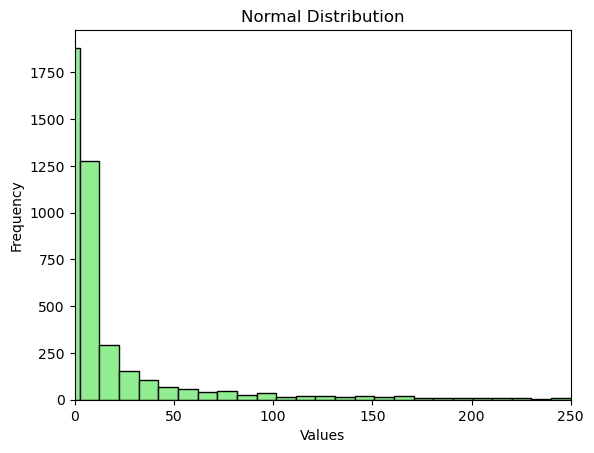

In [16]:
import matplotlib.pyplot as plt

plt.hist(df_comments[df_comments['Score']<=250]['Score'], bins=30, color='lightgreen', edgecolor='black')
plt.xlim(0,250)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Normal Distribution')
plt.show()